In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
# label name of Fashoin MNIST Dataset
label_name = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

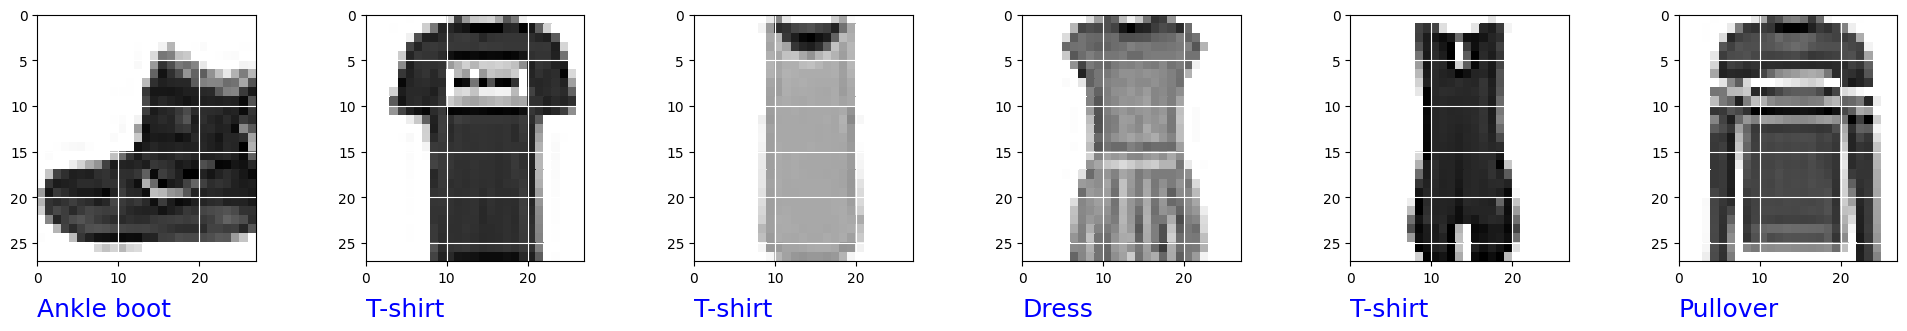

In [ ]:
# 이미지로 출력
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(24, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()

for id in range(6) :
    plt.subplot(1, 6, id + 1)
    img = x_train[id, :, :]
    plt.pcolor(255 - img)
    plt.text(0, 33, "%s" % label_name[y_train[id]], color = 'blue', fontsize=18)

    plt.xlim(0, 27)
    plt.ylim(27, 0)

    plt.grid('on', color = 'white')
plt.show()

In [ ]:
x_valid = x_train[55000 : ]
y_valid = y_train[55000 : ]
x_train = x_train[ : 55000]
y_train = y_train [ : 55000]

In [ ]:
x_valid.shape

(5000, 28, 28)

In [ ]:
y_valid.shape

(5000,)

In [ ]:
x_train.shape

(55000, 28, 28)

In [ ]:
y_train.shape

(55000,)

In [ ]:
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(55000, 50, 50, 1) # 데이터 하나의 shape (50, 50, 1)
x_train = x_train.astype('float32')
x_train = x_train / 255
x_valid = x_valid.reshape(5000, 50, 50, 1)
x_valid = x_valid.astype('float32')
x_valid = x_valid / 255
x_test = x_test.reshape(10000, 50, 50, 1)
x_test = x_test.astype('float32')
x_test = x_test / 255

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_valid = to_categorical(y_valid, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
# CNN 모델 구축
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam

np.random.seed(1)

model_cnn = Sequential()
model_cnn.add(Conv2D(8, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(num_classes, activation='softmax'))

model_cnn.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 10)                62730     
                                                                 
Total params: 62810 (245.35 KB)
Trainable params: 62810 (245.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import time

start_time = time.time()

history = model_cnn.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1,
                        validation_data=(x_valid, y_valid))

print("computation time:{:.3f} sec".format(time.time() - start_time))

Epoch 1/20
55/55 [==============================] - 5s 11ms/step - loss: 0.8733 - accuracy: 0.7101 - val_loss: 0.5466 - val_accuracy: 0.8088
Epoch 2/20
55/55 [==============================] - 1s 9ms/step - loss: 0.5076 - accuracy: 0.8253 - val_loss: 0.4750 - val_accuracy: 0.8318
Epoch 3/20
55/55 [==============================] - 0s 9ms/step - loss: 0.4574 - accuracy: 0.8434 - val_loss: 0.4350 - val_accuracy: 0.8442
Epoch 4/20
55/55 [==============================] - 0s 7ms/step - loss: 0.4311 - accuracy: 0.8521 - val_loss: 0.4197 - val_accuracy: 0.8538
Epoch 5/20
55/55 [==============================] - 0s 6ms/step - loss: 0.4215 - accuracy: 0.8551 - val_loss: 0.4142 - val_accuracy: 0.8590
Epoch 6/20
55/55 [==============================] - 0s 6ms/step - loss: 0.4040 - accuracy: 0.8609 - val_loss: 0.4083 - val_accuracy: 0.8604
Epoch 7/20
55/55 [==============================] - 0s 6ms/step - loss: 0.3927 - accuracy: 0.8646 - val_loss: 0.3972 - val_accuracy: 0.8578
Epoch 8/20
55/55 [=

In [ ]:
score = model_cnn.evaluate(x_test, y_test, verbose=0)

print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.36391887068748474
Test accuracy: 0.8741000294685364


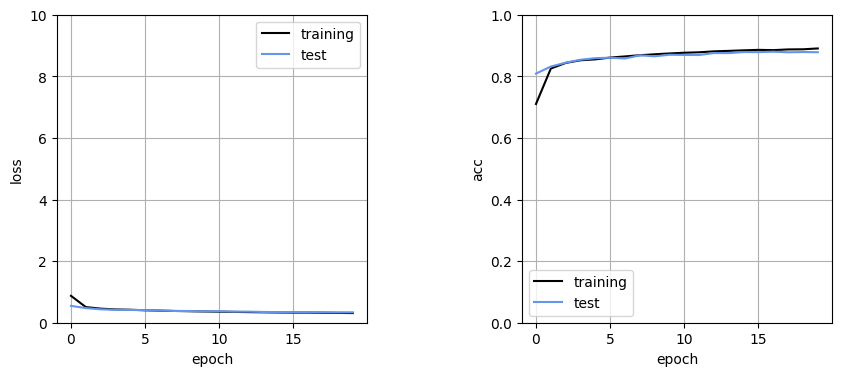

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize = (10, 4))
plt.subplots_adjust(wspace = 0.5)

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'training', color = 'black')
plt.plot(history.history['val_loss'], label = 'test', color ='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label = 'training', color = 'black')
plt.plot(history.history['val_accuracy'], label = 'test', color = 'cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

313/313 [==============================] - 1s 2ms/step
Total wrong answer:  11 / 96


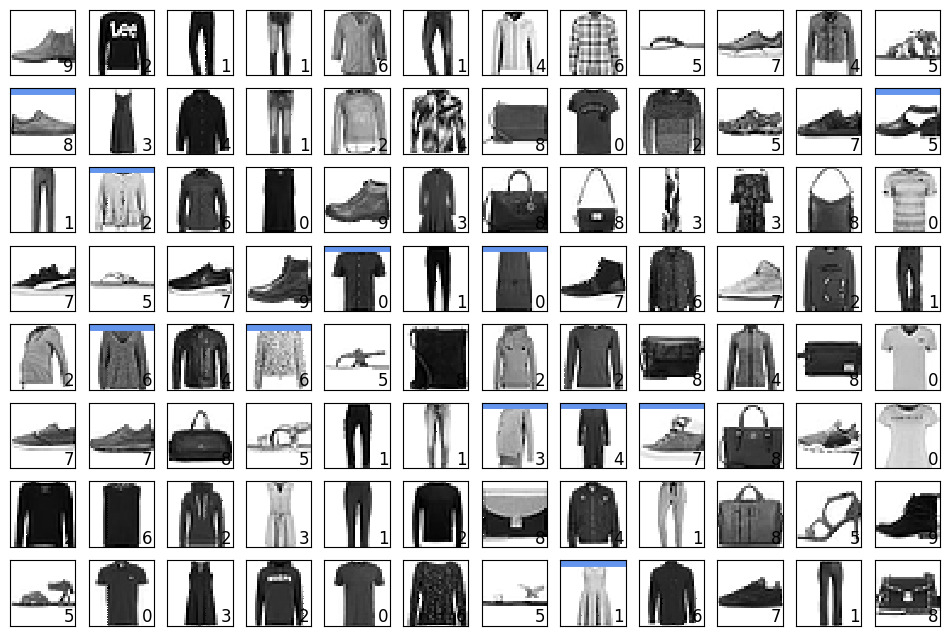

In [ ]:

def show_prediction():
    n_show = 96
    y = model_cnn.predict(x_test) # (A) x_test 전체에 대한 모델의 출력 y 를 얻을 수 있다.
    plt.figure(2, figsize = (12, 8))
    plt.gray()
    wrong_answer = 0
    # 그중 처음 96개 분량을 이미지로 출력, 파란색 가로줄은 오인식일 경우를 나타낸다.
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :] # i 번째 출력 레이블을 가져온다
        prediction = np.argmax(wk)  # wk 에서 값이 가장 큰 요소의 인덱스 값을 가져온다 = 정답 레이블의 번호 0 ~ 9 중 하나
        plt.text(22, 25.5, "%d" % prediction, fontsize = 12)

        if prediction != np.argmax(y_test[i, :]): # 예측 결과(prediction) 과 y_test가 일치하지 않은 경우 상단에 파란색 줄을 긋는다.
            plt.plot([0, 27], [1, 1], color ='cornflowerblue', linewidth = 5)
            wrong_answer = wrong_answer + 1

        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")
    print("Total wrong answer: {0: d} / 96" .format(wrong_answer))

# 메인
show_prediction()
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

np.random.seed(1)

model_cnn_2_1 = Sequential()
model_cnn_2_1.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu'))
model_cnn_2_1.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model_cnn_2_1.add(MaxPooling2D(pool_size=(2,2))) # 최대 풀링층 2 * 2
model_cnn_2_1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_cnn_2_1.add(MaxPooling2D(pool_size=(2,2))) # 최대 풀링층 2 * 2
model_cnn_2_1.add(Dropout(0.25)) # Dropout 수행으로 0.25는 남은 뉴런의 비율을 의미
model_cnn_2_1.add(Flatten())
model_cnn_2_1.add(Dense(128, activation='relu'))
model_cnn_2_1.add(Dropout(0.25)) # Dropout
model_cnn_2_1.add(Dense(num_classes, activation='softmax'))

model_cnn_2_1.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
model_cnn_2_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)         

In [ ]:
import time

start_time = time.time()

history = model_cnn_2_1.fit(x_train, y_train, batch_size=1000, epochs=30, verbose=1,
                          validation_data=(x_valid, y_valid))

print("computation time:{:.3f} sec".format(time.time() - start_time))

Epoch 1/30
55/55 [==============================] - 9s 43ms/step - loss: 0.8984 - accuracy: 0.6778 - val_loss: 0.4707 - val_accuracy: 0.8272
Epoch 2/30
55/55 [==============================] - 2s 40ms/step - loss: 0.4741 - accuracy: 0.8289 - val_loss: 0.3826 - val_accuracy: 0.8600
Epoch 3/30
55/55 [==============================] - 2s 41ms/step - loss: 0.4028 - accuracy: 0.8550 - val_loss: 0.3511 - val_accuracy: 0.8690
Epoch 4/30
55/55 [==============================] - 2s 40ms/step - loss: 0.3646 - accuracy: 0.8686 - val_loss: 0.3117 - val_accuracy: 0.8810
Epoch 5/30
55/55 [==============================] - 2s 39ms/step - loss: 0.3416 - accuracy: 0.8768 - val_loss: 0.3178 - val_accuracy: 0.8824
Epoch 6/30
55/55 [==============================] - 2s 41ms/step - loss: 0.3199 - accuracy: 0.8835 - val_loss: 0.2858 - val_accuracy: 0.8890
Epoch 7/30
55/55 [==============================] - 2s 39ms/step - loss: 0.2964 - accuracy: 0.8922 - val_loss: 0.2748 - val_accuracy: 0.8956
Epoch 8/30
55

In [ ]:
score = model_cnn_2_1.evaluate(x_test, y_test, verbose=0)

print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.21857766807079315
Test accuracy: 0.9243999719619751


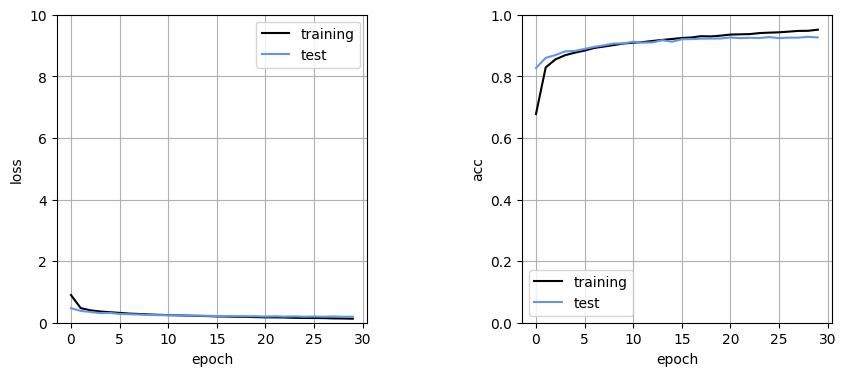

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize = (10, 4))
plt.subplots_adjust(wspace = 0.5)

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'training', color = 'black')
plt.plot(history.history['val_loss'], label = 'test', color ='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label = 'training', color = 'black')
plt.plot(history.history['val_accuracy'], label = 'test', color = 'cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

313/313 [==============================] - 1s 2ms/step
Total wrong answer:  8 / 96


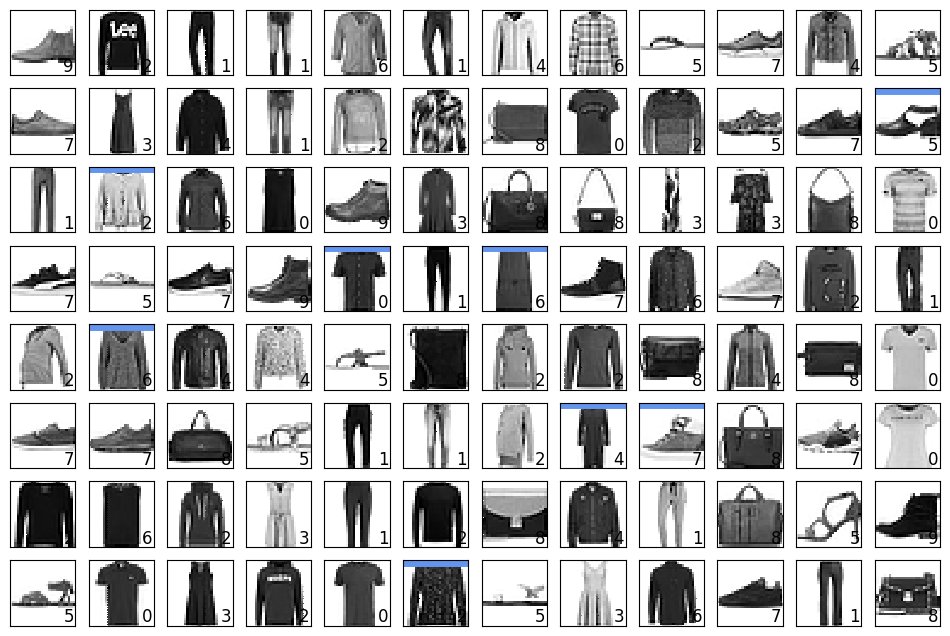

In [ ]:
# 실제 테스트 데이터를 입력했을 때 모델의 출력
def show_prediction():
    n_show = 96
    y = model_cnn_2_1.predict(x_test) # (A) x_test 전체에 대한 모델의 출력 y 를 얻을 수 있다.
    plt.figure(2, figsize = (12, 8))
    plt.gray()
    wrong_answer = 0
    # 그중 처음 96개 분량을 이미지로 출력, 파란색 가로줄은 오인식일 경우를 나타낸다.
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :] # i 번째 출력 레이블을 가져온다
        prediction = np.argmax(wk)  # wk 에서 값이 가장 큰 요소의 인덱스 값을 가져온다 = 정답 레이블의 번호 0 ~ 9 중 하나
        plt.text(22, 25.5, "%d" % prediction, fontsize = 12)

        if prediction != np.argmax(y_test[i, :]): # 예측 결과(prediction) 과 y_test가 일치하지 않은 경우 상단에 파란색 줄을 긋는다.
            plt.plot([0, 27], [1, 1], color ='cornflowerblue', linewidth = 5)
            wrong_answer = wrong_answer + 1

        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")
    print("Total wrong answer: {0: d} / 96" .format(wrong_answer))

# 메인
show_prediction()
plt.show()